# Coursera_Capstone Project

This notebook will be used primairily for the IBM Data Science Professional Certificate course offered through Coursera

In [1]:
import pandas as pd
import numpy as np

print ("Hello Capstone Project Course!")


Hello Capstone Project Course!


### Data Preperation and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
# Import Data

df=pd.read_csv('/Users/chadhackert/Desktop/Coursera_Capstone/Data-Collisions.csv')

/Users/chadhackert/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
# Drop columns which do not relate to the severity of the accident or are duplicates

df.drop(['OBJECTID','INCKEY', 'LOCATION', 'COLDETKEY','REPORTNO','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC',
         'SEVERITYCODE.1', 'SEVERITYDESC', 'JUNCTIONTYPE', 'SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM', 'ST_COLCODE',
         'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

In [7]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
INTKEY            float64
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
HITPARKEDCAR       object
dtype: object


In [8]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,37475.0,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,-122.347294,47.647172,Block,NaN,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,-122.334540,47.607871,Block,NaN,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,-122.334803,47.604803,Block,NaN,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,-122.306426,47.545739,Intersection,34387.0,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [9]:
# Find rows/columns with missing data

miss_data= df.isnull()
miss_data.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
2,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False


In [10]:
# For Loop search for missing data

for column in miss_data.columns.values.tolist():
    print(column)
    print (miss_data[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012


In [11]:
# Replace empty cells with data where able

# X, Y position data is unable to be added
# ADDRTYPE data is unable to be added
# COLLISIONTYPE data is unable to be added
# PERSONCOUNT data is complete
# PEDCOUNT data is complete
# PEDCYLCOUNT data is complete
# VEHCOUNT data is complete
# INCDATE data is complete
# INCDTTM data is complete

# INATTENTIONIND data add
df['INATTENTIONIND'].replace('Y', 1, inplace=True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)

# UNDERINFL data is unable to be added
# WEATHER data is unable to be added
# ROADCOND data is unable to be added
# LIGHTCOND data is unable to be added

# PEDROWNOTGRNT data add
df['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)

# SPEEDING data add
df['SPEEDING'].replace('Y', 1, inplace=True)
df['SPEEDING'].replace(np.nan, 0, inplace=True)

# HITPARKEDCAR data is complete


In [12]:
# Change UNDERINFL dtype from "object" to "int64" (1=True, 0=False)
df['UNDERINFL'].replace('Y', 1, inplace=True)
df['UNDERINFL'].replace('N', 0, inplace=True)
df['UNDERINFL'].replace('1', 1, inplace=True)
df['UNDERINFL'].replace('0', 0, inplace=True)

In [13]:
# Change SEVERITYCODE data to binary format (1=Injury, 0=Property Damage)
df["SEVERITYCODE"].replace(1, 0, inplace=True)
df["SEVERITYCODE"].replace(2, 1, inplace=True)

In [14]:
# recheck for missing data

miss_data2= df.isnull()
miss_data2.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
for column in miss_data2.columns.values.tolist():
    print(column)
    print (miss_data2[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, 

In [16]:
# Drop whole rows with NaN in 'X' (and therfore also the 'Y') column (5334)
df.dropna(subset=["X"], axis=0, inplace=True)

# Drop whole rows with NaN in 'ADDRTYPE' column (1926)
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)

# Drop whole rows with NaN in 'COLLISIONTYPE' column (4904)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)

# Drop whole rows with NaN in 'UNDERINFL' column (4884)
df.dropna(subset=["UNDERINFL"], axis=0, inplace=True)

# Drop whole rows with NaN in 'WEATHER' column (5081)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)

# Drop whole rows with NaN in 'ROADCOND' column (5012)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)

# Drop whole rows with NaN in 'LIGHTCOND' column (5170)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)

# 10527 rows were dropped due to missing data which constitues 5.4% of the total records. 


# reset index, because we droped over 10527 rows
df.reset_index(drop=True, inplace=True)

In [17]:
# Cannot drop missing data rows from 'INTKEY'as it would eliminate 33% of the data
# as the data is limited in the column drop 'INTKEY'

df.drop(['INTKEY'], axis=1, inplace=True)

In [18]:
df.shape

(184146, 19)

In [19]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
INATTENTIONIND    float64
UNDERINFL         float64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT     float64
SPEEDING          float64
HITPARKEDCAR       object
dtype: object


In [20]:
df.rename(columns = {'X': 'LONG','Y': 'LAT'},inplace=True)
df

,SEVERITYCODE,LONG,LAT,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,1,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,0.0,0.0,Overcast,Wet,Daylight,0.0,0.0,N
1,0,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0.0,0.0,Raining,Wet,Dark - Street Lights On,0.0,0.0,N
2,0,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0.0,0.0,Overcast,Dry,Daylight,0.0,0.0,N
3,0,-122.334803,47.604803,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,0.0,0.0,Clear,Dry,Daylight,0.0,0.0,N
4,1,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0.0,0.0,Raining,Wet,Daylight,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184141,1,-122.290826,47.565408,Block,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,0.0,0.0,Clear,Dry,Daylight,0.0,0.0,N
184142,0,-122.344526,47.690924,Block,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,1.0,0.0,Raining,Wet,Daylight,0.0,0.0,N
184143,1,-122.306689,47.683047,Intersection,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,0.0,0.0,Clear,Dry,Daylight,0.0,0.0,N
184144,1,-122.355317,47.678734,Intersection,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,0.0,0.0,Clear,Dry,Dusk,0.0,0.0,N


In [21]:
# Save cleaned data in new .csv file

df.to_csv('/Users/chadhackert/Desktop/Coursera_Capstone/Collisions Corrected.csv', index=False)

### Initial Data Assessment

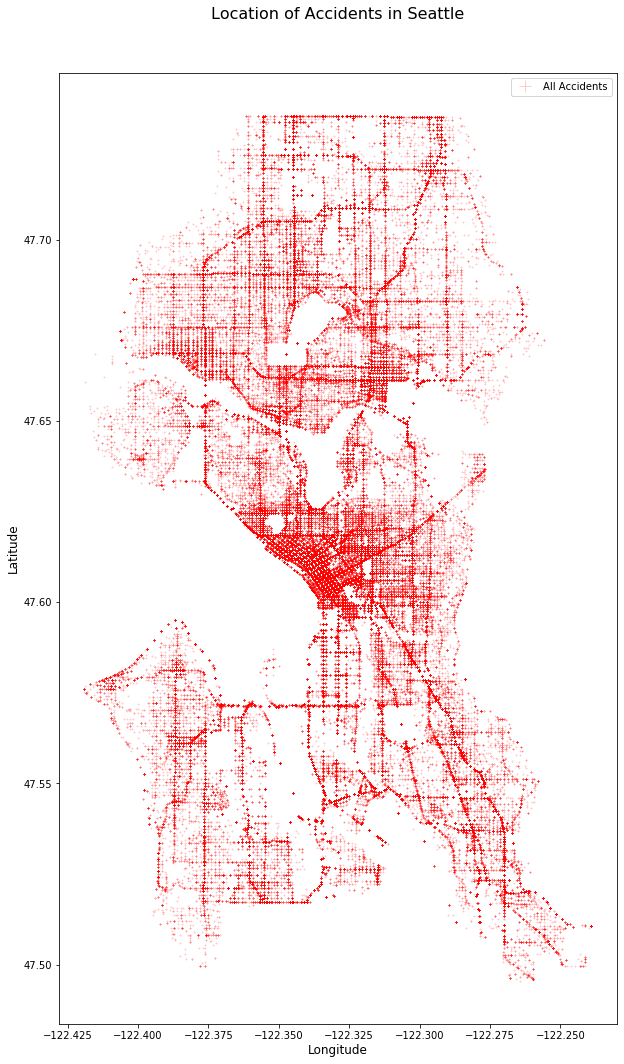

In [22]:
# Display map view of accidents in Seattle

plt.figure(figsize=(10,17.5))

plt.plot( 'LONG', 'LAT', data=df, linestyle='', marker='+', markersize=1.5, color="Red", alpha=0.2,
         label='All Accidents')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Location of Accidents in Seattle', size=16, y=1.05)
plt.show()

# Code modified from code found at https://github.com/priyesh05/Coursera_Capstone/blob/master/Final%20Capstone%20Notebook.ipynb.
# Used because the heat/location maps I was generating were too noisy or busy.  This one is much cleaner.  
# Thanks to the author.


In [23]:
# Determine the number of physical injury accidents (1) vs property damage only accidents (0) 

df['SEVERITYCODE'].value_counts()

0    128146
1     56000
Name: SEVERITYCODE, dtype: int64

In [24]:
# Corrected dataset has 56000 injury accident and 128146 property damage accidents

In [25]:
# Check number of records for each address type

df['ADDRTYPE'].value_counts()

Block           121017
Intersection     63129
Name: ADDRTYPE, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec940a2e90>,
      dtype=object)

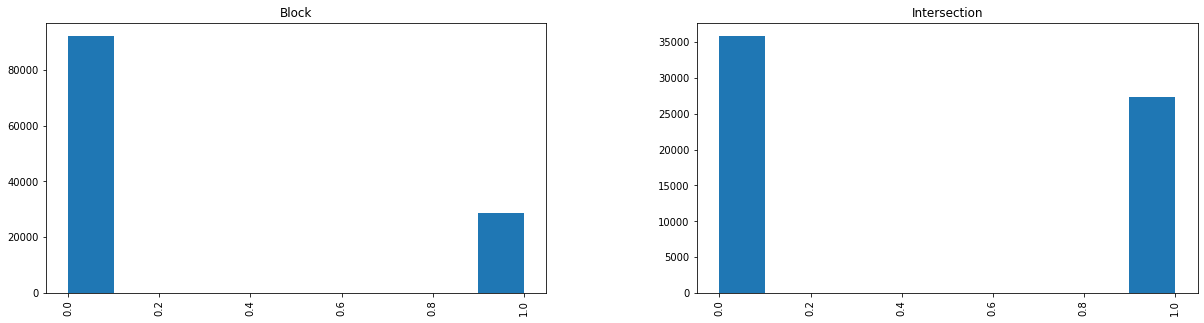

In [26]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['ADDRTYPE'], figsize=(20,5))

In [27]:
# Check number of records for each collision type

df['COLLISIONTYPE'].value_counts()

Parked Car    46213
Angles        34407
Rear Ended    32918
Other         22195
Sideswipe     18004
Left Turn     13608
Pedestrian     6536
Cycles         5366
Right Turn     2908
Head On        1991
Name: COLLISIONTYPE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec91816350>,
      dtype=object)

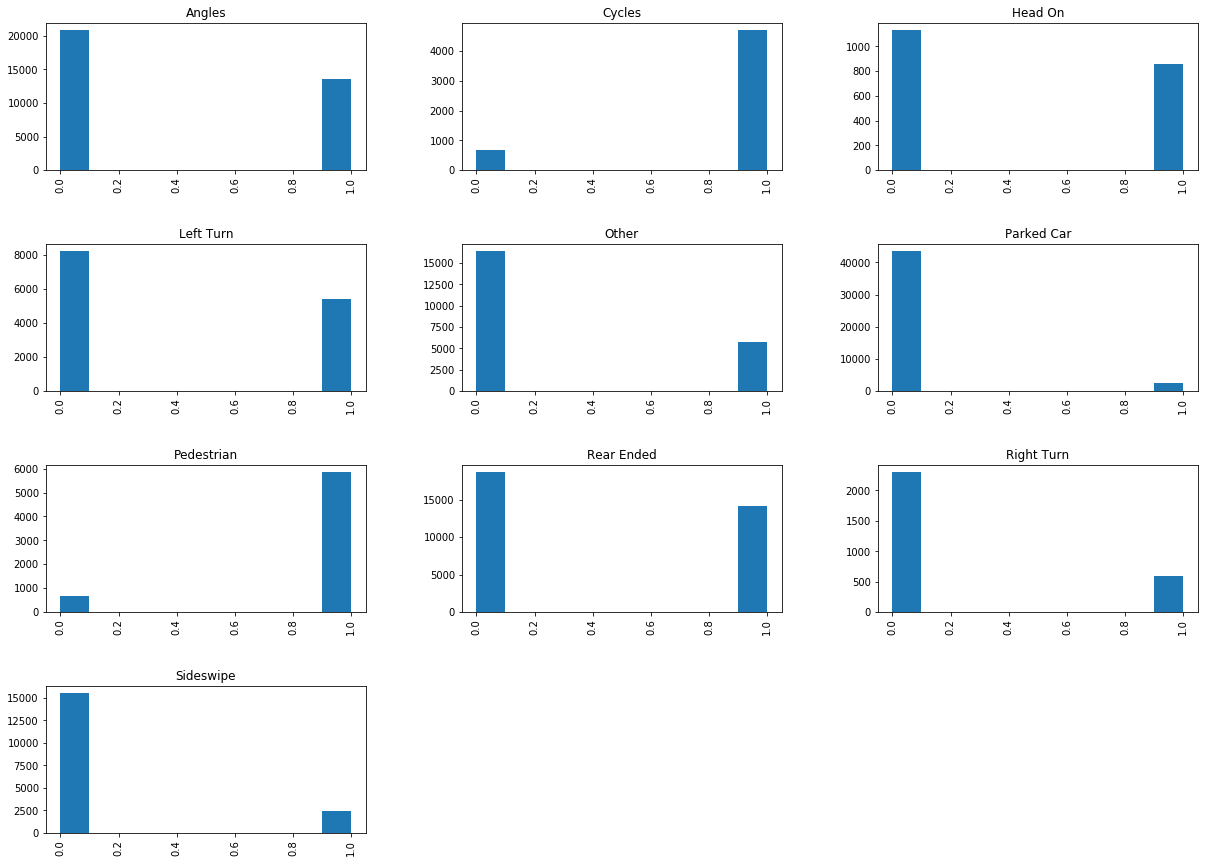

In [28]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['COLLISIONTYPE'], figsize=(20,15))

In [29]:
# Check number of records for each accident based on the number of people involved

df['PERSONCOUNT'].value_counts()

2     107932
3      34502
4      14201
1      10776
5       6463
0       5433
6       2654
7       1099
8        523
9        207
10       127
11        54
12        32
13        21
14        17
15        11
17        11
16         7
18         6
44         6
19         5
20         5
25         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec945e98d0>,
      dtype=object)

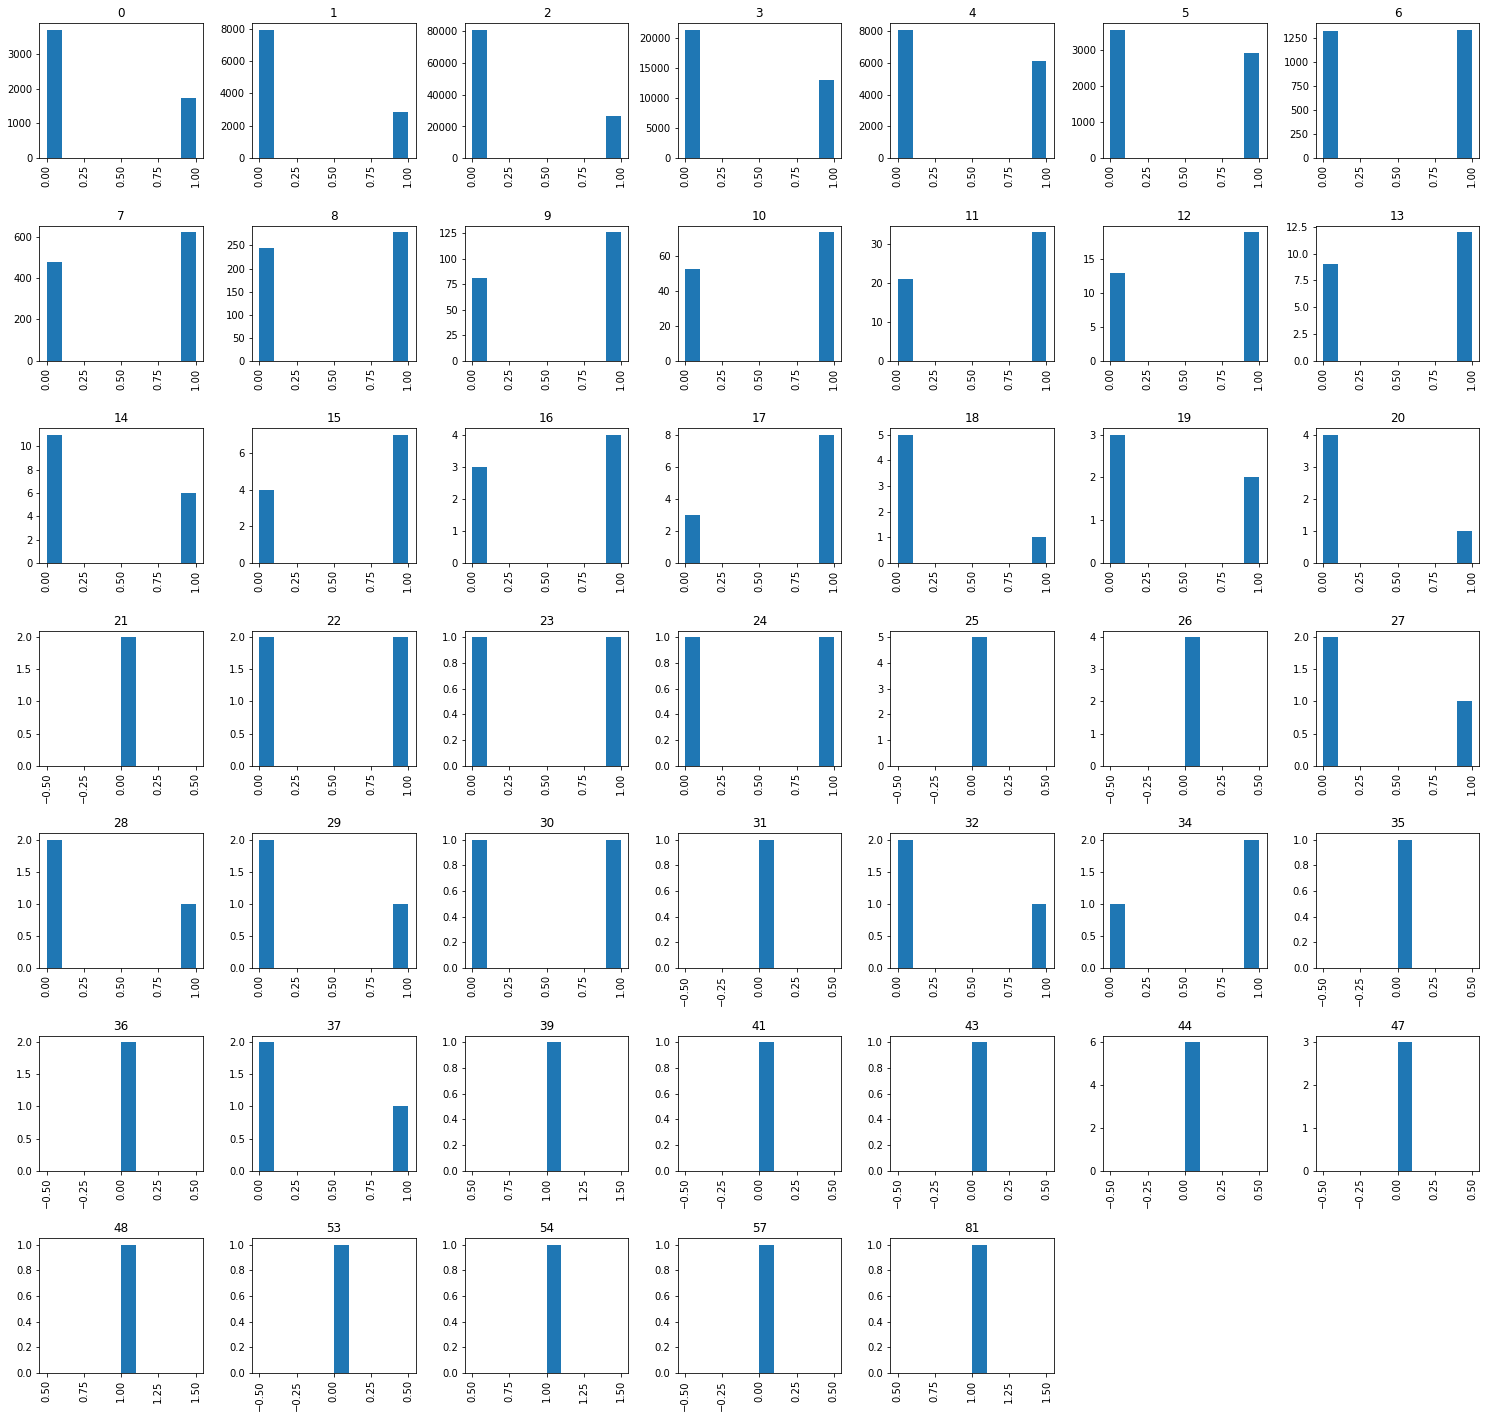

In [30]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['PERSONCOUNT'], figsize=(25,25))

In [31]:
# Check number of records for each pedestrian involved

df['PEDCOUNT'].value_counts()

0    177282
1      6611
2       225
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9a6e9b90>,
      dtype=object)

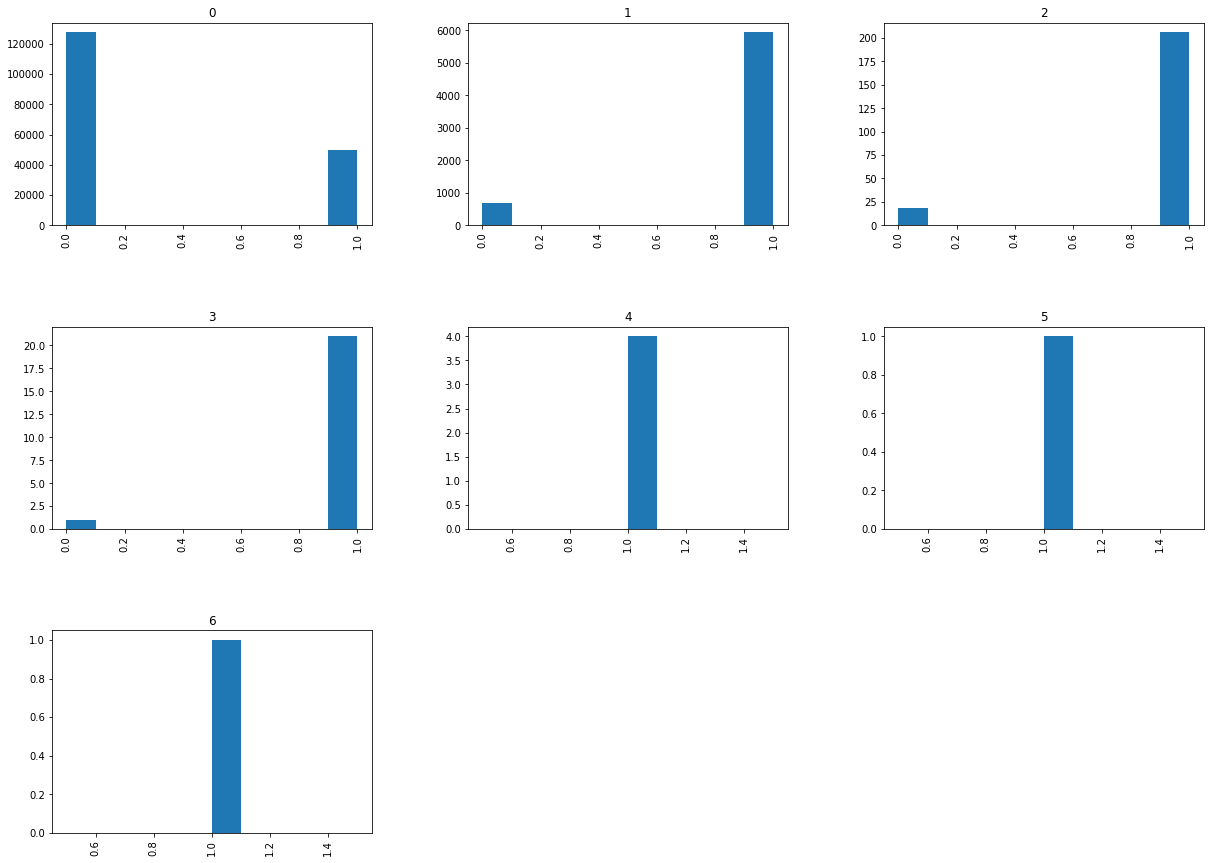

In [32]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['PEDCOUNT'], figsize=(20,15))

In [33]:
# Check number of records for each cyclist involved

df['PEDCYLCOUNT'].value_counts()

0    178726
1      5378
2        42
Name: PEDCYLCOUNT, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9d3b7d50>,
      dtype=object)

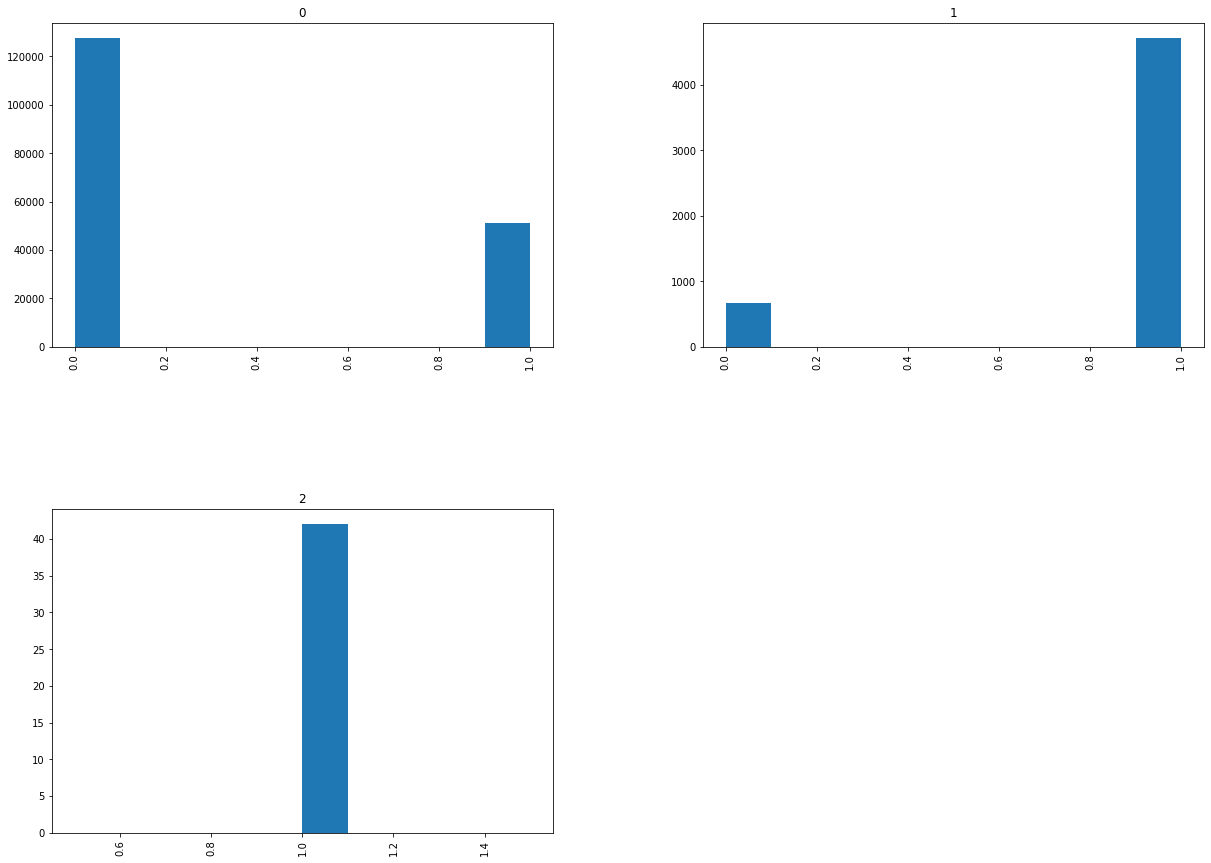

In [34]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['PEDCYLCOUNT'], figsize=(20,15))

In [35]:
# Check number of records for each accident based on the number of vehicles involved

df['VEHCOUNT'].value_counts()

2     143682
1      24455
3      12699
4       2377
5        520
0        196
6        143
7         42
8         15
9          9
11         5
10         2
12         1
Name: VEHCOUNT, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9d5118d0>,
      dtype=object)

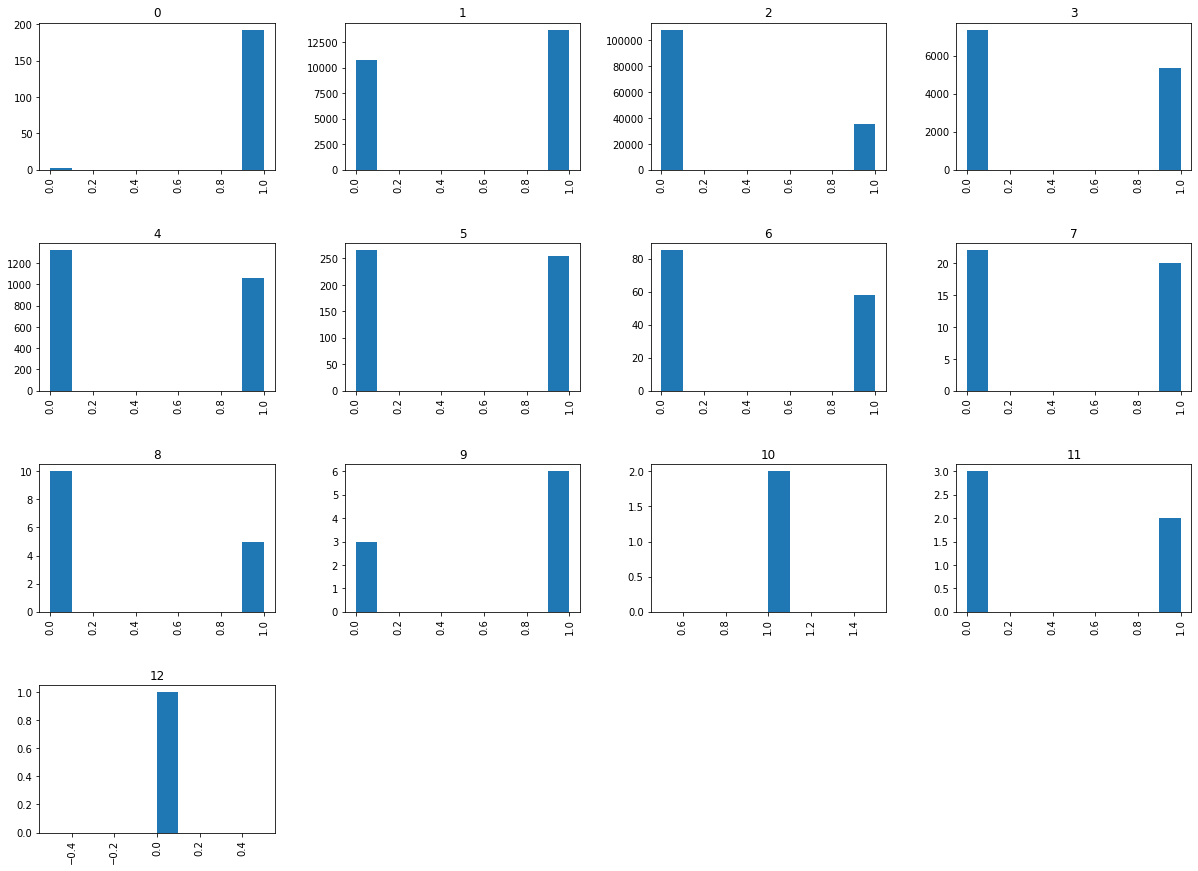

In [36]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['VEHCOUNT'], figsize=(20,15))

In [37]:
# Check number of records where driver inattention was identified

df['INATTENTIONIND'].value_counts()

0.0    155049
1.0     29097
Name: INATTENTIONIND, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9dd38690>,
      dtype=object)

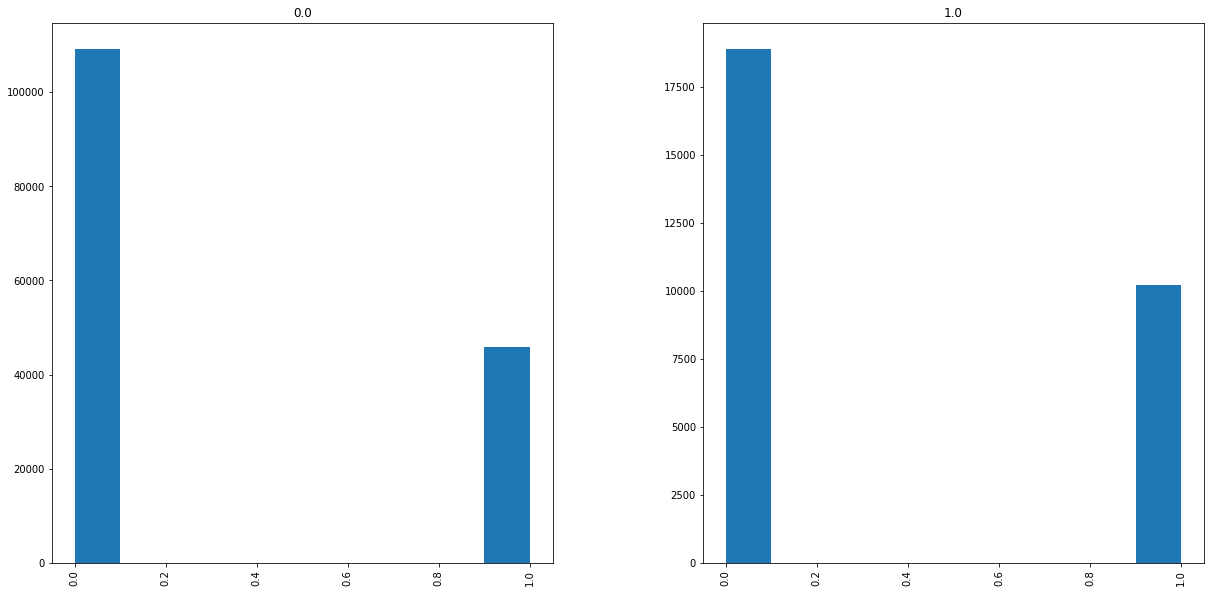

In [38]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['INATTENTIONIND'], figsize=(20,10))

In [39]:
# Check number of records where driver inebriation was identified

df['UNDERINFL'].value_counts()

0.0    175288
1.0      8858
Name: UNDERINFL, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9dd38950>,
      dtype=object)

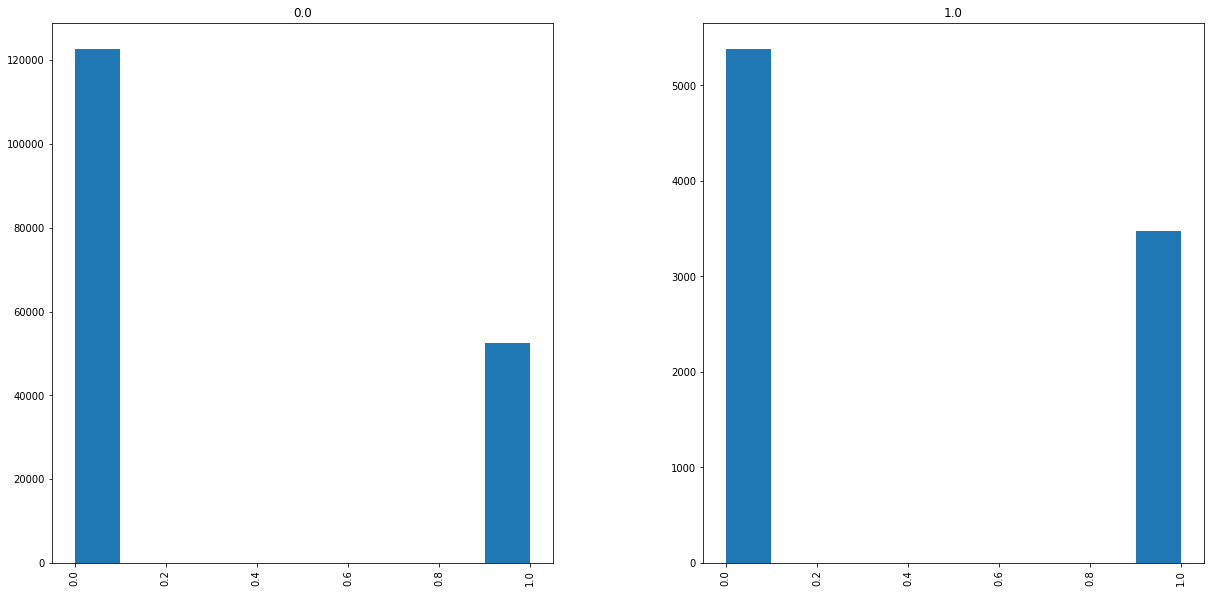

In [40]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['UNDERINFL'], figsize=(20,10))

In [41]:
# Check number of records for each weather condition type

df['WEATHER'].value_counts()

Clear                       108827
Raining                      31980
Overcast                     27099
Unknown                      13844
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9f544450>,
      dtype=object)

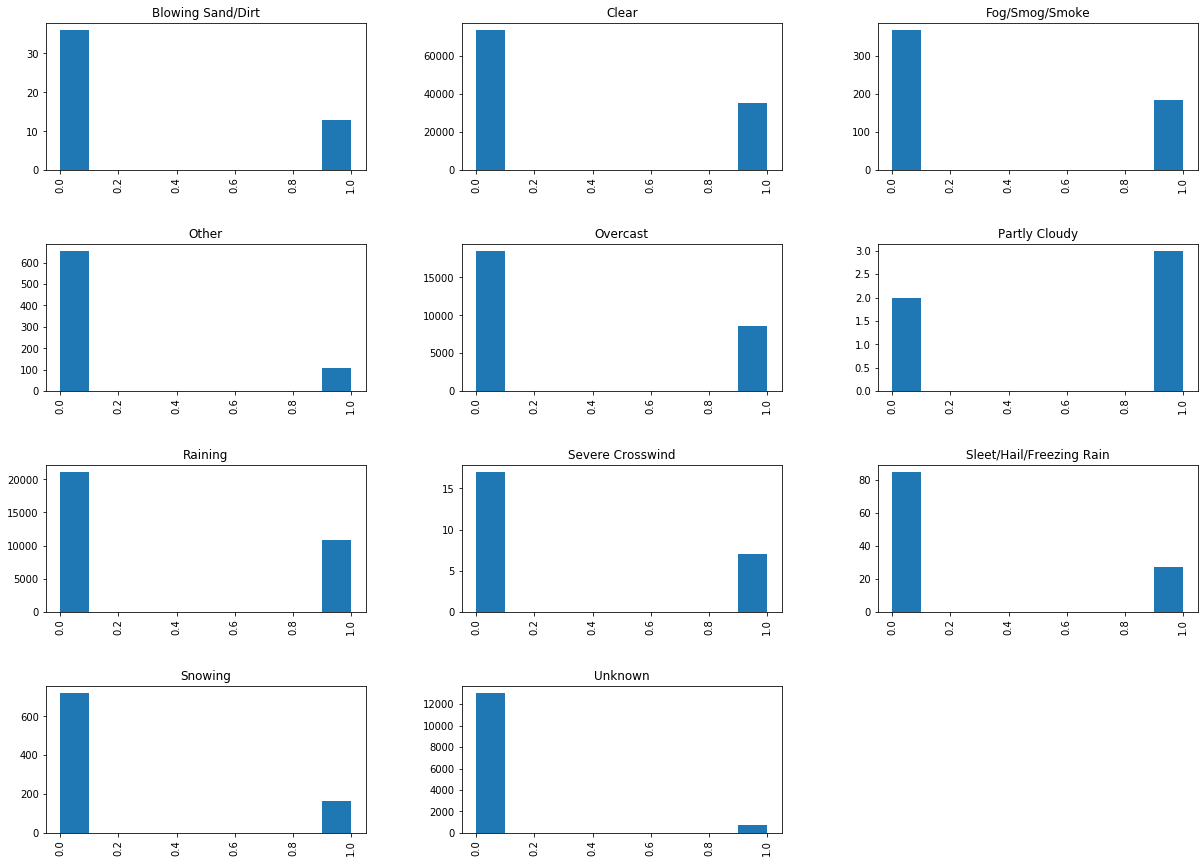

In [42]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['WEATHER'], figsize=(20,15))

In [43]:
# Check number of records for each road condition type

df['ROADCOND'].value_counts()

Dry               121865
Wet                45999
Unknown            13791
Ice                 1173
Snow/Slush           984
Other                116
Standing Water       102
Sand/Mud/Dirt         63
Oil                   53
Name: ROADCOND, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca0a06250>,
      dtype=object)

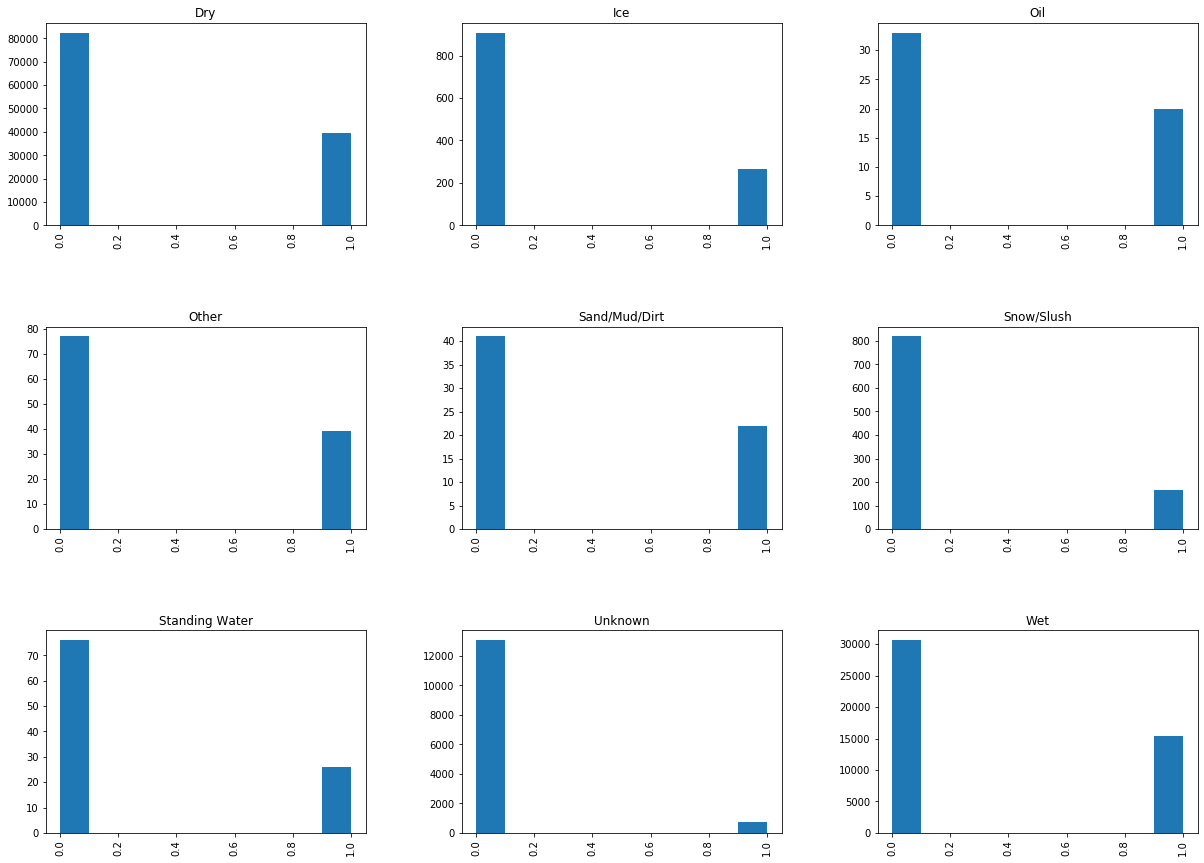

In [44]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['ROADCOND'], figsize=(20,15))

In [45]:
# Check number of records for each lighting condition type

df['LIGHTCOND'].value_counts()

Daylight                    113509
Dark - Street Lights On      47247
Unknown                      12414
Dusk                          5762
Dawn                          2421
Dark - No Street Lights       1449
Dark - Street Lights Off      1145
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca086b650>,
      dtype=object)

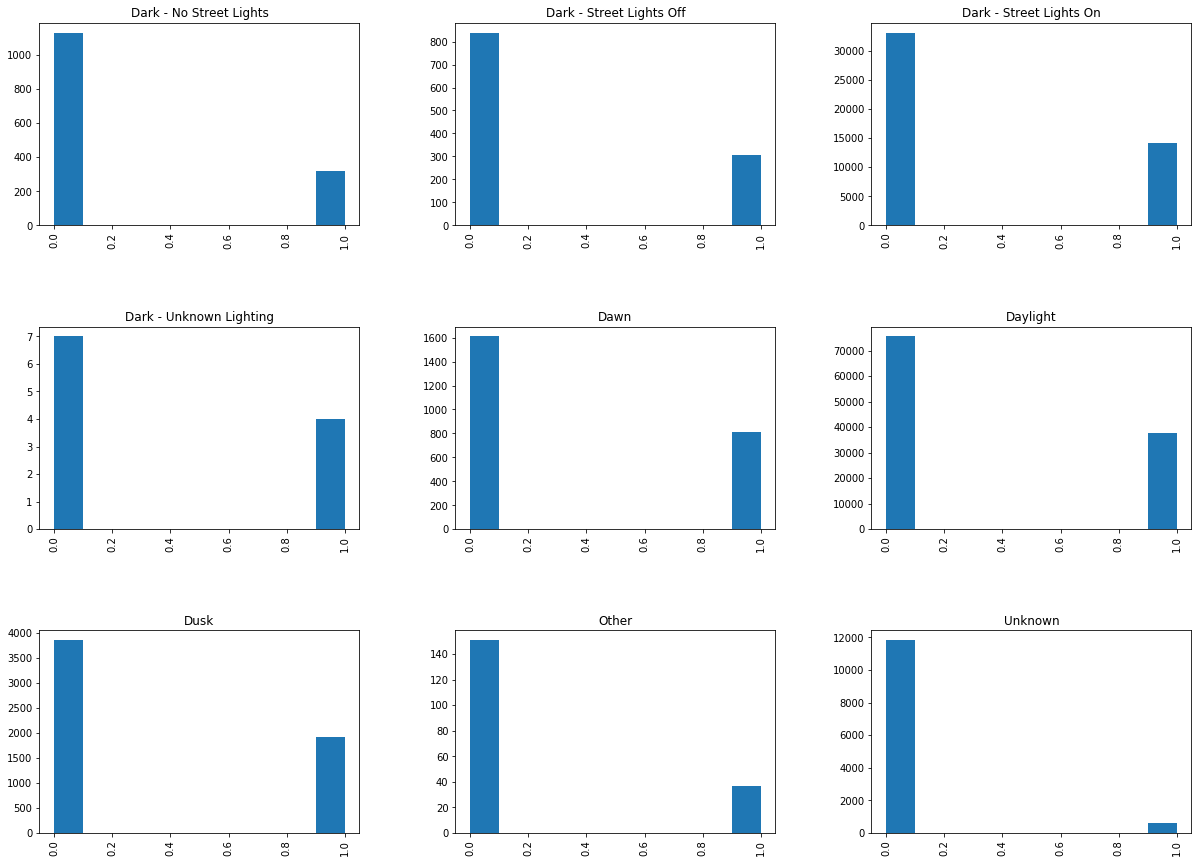

In [46]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['LIGHTCOND'], figsize=(20,15))

In [47]:
# Check number of records where driver did not grant pedestrian right of way was identified

df['PEDROWNOTGRNT'].value_counts()

0.0    179506
1.0      4640
Name: PEDROWNOTGRNT, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feca8bc0bd0>,
      dtype=object)

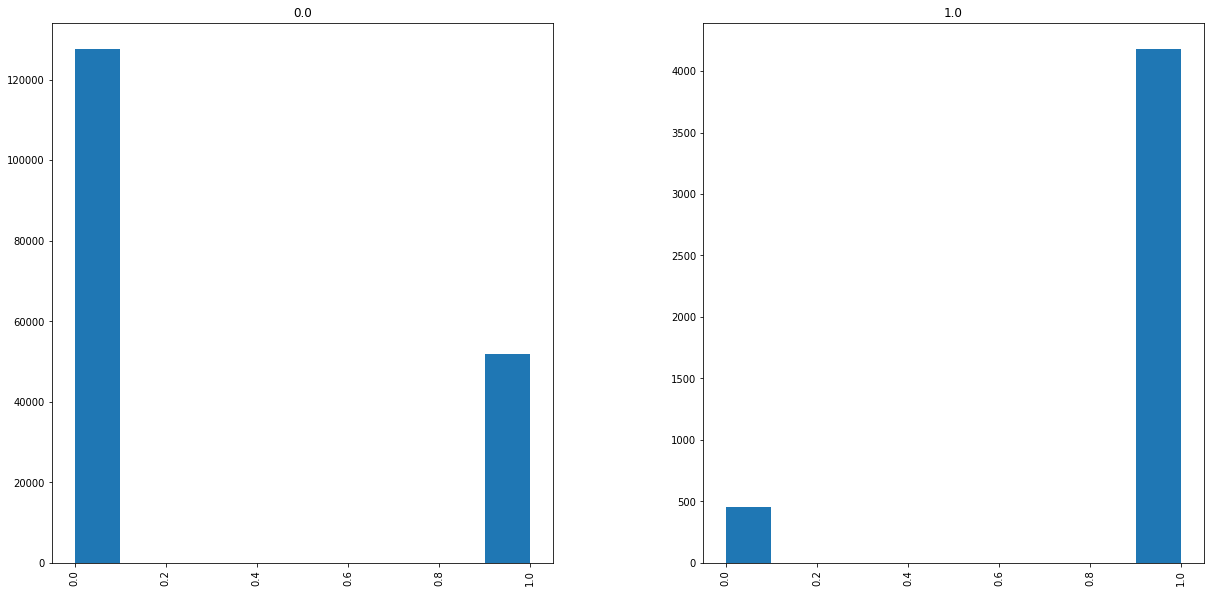

In [48]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['PEDROWNOTGRNT'], figsize=(20,10))

In [49]:
# Check number of records where speeding was identified

df['SPEEDING'].value_counts()

0.0    175440
1.0      8706
Name: SPEEDING, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feca8bc0990>,
      dtype=object)

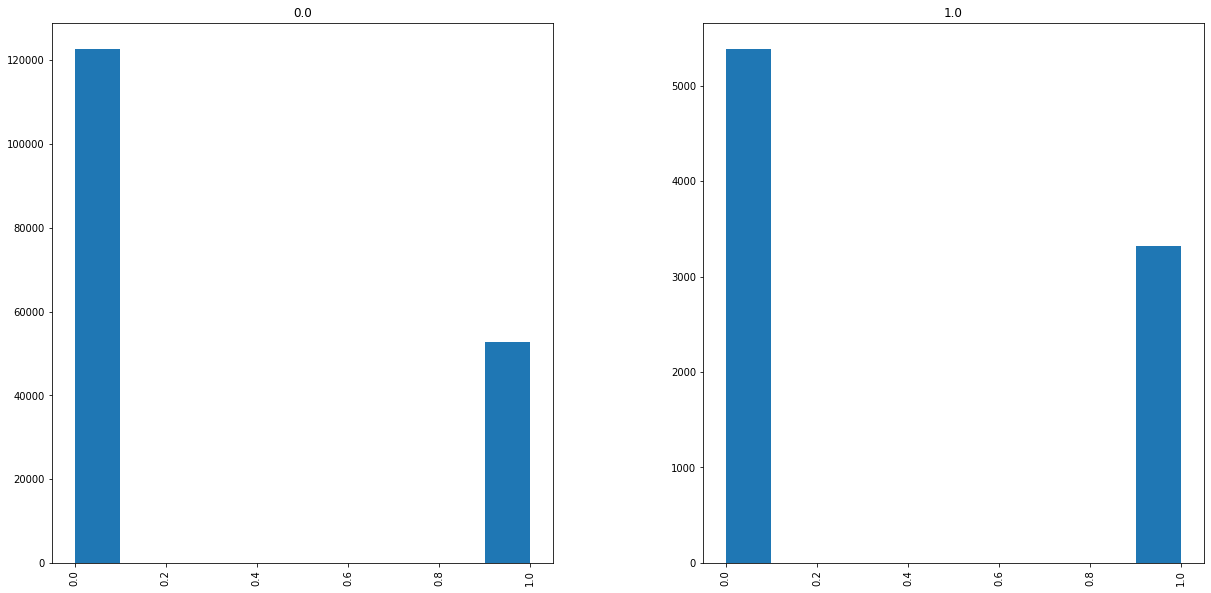

In [50]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['SPEEDING'], figsize=(20,10))

In [51]:
# Check number of records where accident involved hitting a parked car

df['HITPARKEDCAR'].value_counts()

N    177518
Y      6628
Name: HITPARKEDCAR, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feca10d6990>,
      dtype=object)

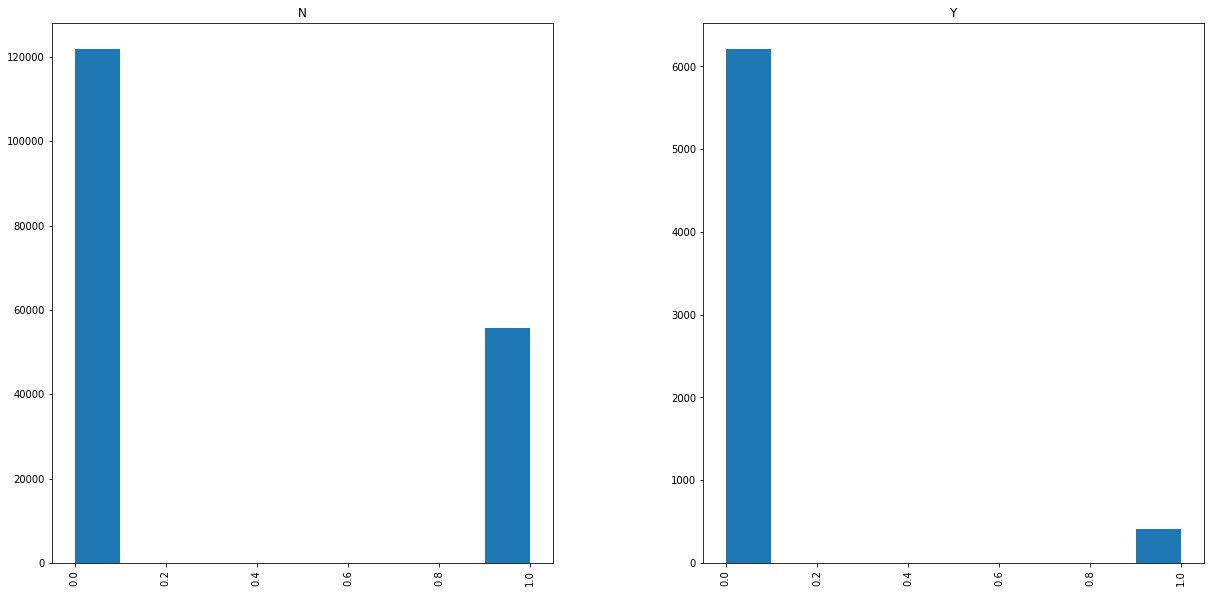

In [52]:
# Determine how many Injury(1) vs Property Damage (0) accidents occured by given feature set 

df['SEVERITYCODE'].hist(by=df['HITPARKEDCAR'], figsize=(20,10))

### Methodology

In [53]:
# These are Address Type (intersection or on street), 
# Collision Type, Driver Inattention, Impaired Driving, Weather, Road Conditions, Light Conditions and speeding. 

In [54]:
mod_df = df[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
             'LIGHTCOND', 'SPEEDING']]

In [55]:
print(mod_df.dtypes)

SEVERITYCODE        int64
ADDRTYPE           object
COLLISIONTYPE      object
INATTENTIONIND    float64
UNDERINFL         float64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING          float64
dtype: object


In [56]:
# Change columns with dtype "object" to "int64"

# Change ADDRTYPE dtype from "object" to "int64" (1=Intersection, 2=Block, 3=Alley)
mod_df['ADDRTYPE'].replace('Intersection', 1, inplace=True)
mod_df['ADDRTYPE'].replace('Block', 2, inplace=True)

# Change COLLISIONTYPE dtype from "object" to "int64" (1=Angles, 2=Sideswipe, 3=Parked Car, 4=Cycles,
#  5=Rear Ended, 6=Head On, 7=Left Turn, 8=Pedestrain, 9=Right Turn, 10=Other)
mod_df['COLLISIONTYPE'].replace('Angles', 1, inplace=True)
mod_df['COLLISIONTYPE'].replace('Sideswipe', 2, inplace=True)
mod_df['COLLISIONTYPE'].replace('Parked Car', 3, inplace=True)
mod_df['COLLISIONTYPE'].replace('Cycles', 4, inplace=True)
mod_df['COLLISIONTYPE'].replace('Rear Ended', 5, inplace=True)
mod_df['COLLISIONTYPE'].replace('Head On', 6, inplace=True)
mod_df['COLLISIONTYPE'].replace('Left Turn', 7, inplace=True)
mod_df['COLLISIONTYPE'].replace('Pedestrian', 8, inplace=True)
mod_df['COLLISIONTYPE'].replace('Right Turn', 9, inplace=True)
mod_df['COLLISIONTYPE'].replace('Other', 10, inplace=True)

# Change WEATHER dtype from "object" to "int64" (1=Clear, 2=Raining, 3=Overcast, 4=Blowing Sand/Dirt,
#  5=Partly Cloudy, 6=Fog/Smog/Smoke, 7=Snowing, 8=Sleet/Hail/Freezing Rain, 9=Sever Crosswind, 10=Other/Unknown)
mod_df['WEATHER'].replace('Clear', 1, inplace=True)
mod_df['WEATHER'].replace('Raining', 2, inplace=True)
mod_df['WEATHER'].replace('Overcast', 3, inplace=True)
mod_df['WEATHER'].replace('Blowing Sand/Dirt', 4, inplace=True)
mod_df['WEATHER'].replace('Partly Cloudy', 5, inplace=True)
mod_df['WEATHER'].replace('Fog/Smog/Smoke', 6, inplace=True)
mod_df['WEATHER'].replace('Snowing', 7, inplace=True)
mod_df['WEATHER'].replace('Sleet/Hail/Freezing Rain', 8, inplace=True)
mod_df['WEATHER'].replace('Severe Crosswind', 9, inplace=True)
mod_df['WEATHER'].replace('Other', 10, inplace=True)
mod_df['WEATHER'].replace('Unknown', 10, inplace=True)

# Change ROADCOND dtype from "object" to "int64" (1=Dry 2=Ice, 3=Wet, 4=Oil,
#  5=Snow/Slush, 6=Sand/Mud/Dirt, 7=Standing Water, 8=Other/Unknown)
mod_df['ROADCOND'].replace('Dry', 1, inplace=True)
mod_df['ROADCOND'].replace('Ice', 2, inplace=True)
mod_df['ROADCOND'].replace('Wet', 3, inplace=True)
mod_df['ROADCOND'].replace('Oil', 4, inplace=True)
mod_df['ROADCOND'].replace('Snow/Slush', 5, inplace=True)
mod_df['ROADCOND'].replace('Sand/Mud/Dirt', 6, inplace=True)
mod_df['ROADCOND'].replace('Standing Water', 7, inplace=True)
mod_df['ROADCOND'].replace('Other', 8, inplace=True)
mod_df['ROADCOND'].replace('Unknown', 8, inplace=True)

# Change LIGHTCOND dtype from "object" to "int64" (1=Daylight 2=Dawn, 3=Dusk, 4=Dark - Street Lights On,
#  5=Dark - Street Lights Off, 6=Dark - No Street Lights, 7=Dark - Unknown Lighting, 8=Other/Unknown)
   
mod_df['LIGHTCOND'].replace('Daylight', 1, inplace=True)
mod_df['LIGHTCOND'].replace('Dawn', 2, inplace=True)
mod_df['LIGHTCOND'].replace('Dusk', 3, inplace=True)
mod_df['LIGHTCOND'].replace('Dark - Street Lights On', 4, inplace=True)
mod_df['LIGHTCOND'].replace('Dark - Street Lights Off', 5, inplace=True)
mod_df['LIGHTCOND'].replace('Dark - No Street Lights', 6, inplace=True)
mod_df['LIGHTCOND'].replace('Dark - Unknown Lighting', 7, inplace=True)
mod_df['LIGHTCOND'].replace('Other', 8, inplace=True)
mod_df['LIGHTCOND'].replace('Unknown', 8, inplace=True)

/Users/chadhackert/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [57]:
print(mod_df.dtypes)

SEVERITYCODE        int64
ADDRTYPE            int64
COLLISIONTYPE       int64
INATTENTIONIND    float64
UNDERINFL         float64
WEATHER             int64
ROADCOND            int64
LIGHTCOND           int64
SPEEDING          float64
dtype: object


In [58]:
mod_df['INATTENTIONIND'] = mod_df['INATTENTIONIND'].astype('Int64')
mod_df['UNDERINFL'] = mod_df['WEATHER'].astype('Int64')
mod_df['SPEEDING'] = mod_df['SPEEDING'].astype('Int64')

/Users/chadhackert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chadhackert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chadhackert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [59]:
print(mod_df.dtypes)

SEVERITYCODE      int64
ADDRTYPE          int64
COLLISIONTYPE     int64
INATTENTIONIND    Int64
UNDERINFL         Int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
SPEEDING          Int64
dtype: object


### Modelling

In [60]:
# Create a feature set 'X' for modeling

X=mod_df[['ADDRTYPE','COLLISIONTYPE','INATTENTIONIND', 'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND', 'SPEEDING']]
X

,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,1,1,0,3,3,3,1,0
1,2,2,0,2,2,3,4,0
2,2,3,0,3,3,1,1,0
3,2,10,0,1,1,1,1,0
4,1,1,0,2,2,3,1,0
...,...,...,...,...,...,...,...,...
184141,2,6,0,1,1,1,1,0
184142,2,5,1,2,2,3,1,0
184143,1,7,0,1,1,1,1,0
184144,1,4,0,1,1,1,3,0


In [61]:
# Create a feature seet 'Y' for modeling

y=mod_df['SEVERITYCODE']

In [62]:
# Import libraries

from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
import scipy.optimize as opt
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline

In [63]:
# Normalize the data

X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.38455029, -1.16015631, -0.43320117,  0.31452976,  0.31452976,
         0.48802608, -0.68025902, -0.22276401],
       [ 0.72225618, -0.81478431, -0.43320117, -0.09509277, -0.09509277,
         0.48802608,  0.78891281, -0.22276401],
       [ 0.72225618, -0.4694123 , -0.43320117,  0.31452976,  0.31452976,
        -0.55241445, -0.68025902, -0.22276401],
       [ 0.72225618,  1.94819176, -0.43320117, -0.50471531, -0.50471531,
        -0.55241445, -0.68025902, -0.22276401],
       [-1.38455029, -1.16015631, -0.43320117, -0.09509277, -0.09509277,
         0.48802608, -0.68025902, -0.22276401]])

In [64]:
# Split the data into testing and training sets and display dimentions

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147316, 8) (147316,)
Test set: (36830, 8) (36830,)


### Classification Modelling

#### K Nearest Neighbour (KNN)

In [65]:
# Train model and predict
k = 4
 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [66]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [67]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.728664910803986
Test set Accuracy:  0.7257127341840891


In [68]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67692099, 0.70312245, 0.69326636, 0.72571273, 0.6984252 ,
       0.72014662, 0.69812653, 0.71357589, 0.71077926])

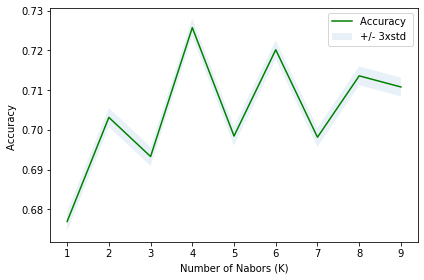

In [69]:
# Plot range of neighbours vs accuracy to find most accurate K value 

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.83      0.80     25504
           1       0.54      0.45      0.49     11326

    accuracy                           0.71     36830
   macro avg       0.65      0.64      0.64     36830
weighted avg       0.70      0.71      0.70     36830

Confusion matrix, without normalization
[[ 5106  6220]
 [ 4432 21072]]


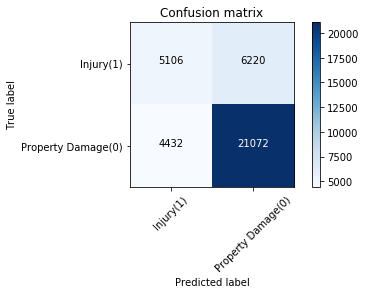

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury(1)','Property Damage(0)'],normalize= False,  
                      title='Confusion matrix')

In [72]:
print('The best accuracy was: ', mean_acc.max(), 'with k=', mean_acc.argmax()+1)

The best accuracy was:  0.7257127341840891 with k= 4


#### Decision Tree Classifier

In [73]:
dectreeclass = DecisionTreeClassifier()
classification = dectreeclass.fit(X_train,y_train)
prediction = dectreeclass.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     25504
           1       0.79      0.22      0.35     11326

    accuracy                           0.74     36830
   macro avg       0.76      0.60      0.59     36830
weighted avg       0.75      0.74      0.69     36830

Confusion matrix, without normalization
[[ 2510  8816]
 [  677 24827]]


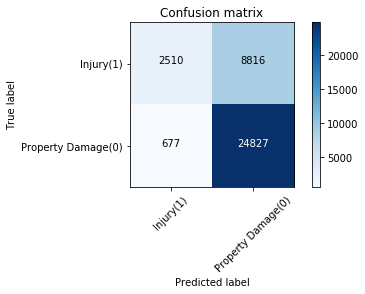

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, prediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury(1)','Property Damage(0)'],normalize= False,  
                      title='Confusion matrix')

In [76]:
print('The best accuracy was ',metrics.accuracy_score(y_test, prediction))

The best accuracy was  0.7422481672549552


#### Logistic Regression

In [77]:
lr = LogisticRegression(fit_intercept=True)

In [78]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81     25504
           1       0.48      0.13      0.20     11326

    accuracy                           0.69     36830
   macro avg       0.59      0.53      0.50     36830
weighted avg       0.64      0.69      0.62     36830



In [81]:
print('The best accuracy was ',metrics.accuracy_score(y_test,y_pred))

The best accuracy was  0.6890306815096389


#### Evaluation

In [82]:
# Define yhat for algorithms for comparison

neigh_yhat = neigh.predict(X_test)
dectreeclass_yhat = dectreeclass.predict(X_test)
lr_yhat = lr.predict(X_test)

#### F1 Score

In [83]:
# KNN F1 Score
f1s1 = (f1_score(y_test, neigh_yhat,average='weighted'))

# Desision Trees F1 Score
f1s2 = (f1_score(y_test, dectreeclass_yhat, average='weighted'))

# Logistic Regression F1 Score
f1s3 = (f1_score(y_test, lr_yhat, average='weighted'))

In [84]:
# Create F1 Score List

list_f1s = [f1s1, f1s2, f1s3]
list_f1s

[0.7032838617422869, 0.6877077184916917, 0.6203797930831502]

#### Jaccard Index

In [85]:
#  KNN Jaccard
jac1 = (jaccard_score(y_test, neigh_yhat))

# Decision Trees Jaccard
jac2 = (jaccard_score(y_test, dectreeclass_yhat))

# Logistic Regression Jaccard
jac3 = (jaccard_score(y_test, lr_yhat))

In [86]:
# Create Jaccard List 

list_jac = [jac1, jac2, jac3]
list_jac

[0.32402589161061046, 0.20911438806964924, 0.11120595995654198]

#### Log Loss

In [87]:
# Logistic Regression Log Loss

LR_yhat_prob = lr.predict_proba(X_test)

In [88]:
# Create Log Loss List 

list_ll = ['NA', 'NA',(log_loss(y_test, LR_yhat_prob))]
list_ll

['NA', 'NA', 0.5776252584397619]

In [114]:
# Create the Evaluation Report

rpt_df = pd.DataFrame( list_f1s,index=['KNN', 'Decision Tree', 'Logistic Regression'])
rpt_df.columns = ['F1 Score']
rpt_df.insert(loc=1, column='Jaccard', value=list_jac)
rpt_df.insert(loc=2, column='Log Loss', value=list_ll)
rpt_df.columns.name = 'ML Algorithm'
rpt_df

ML Algorithm,F1 Score,Jaccard,Log Loss
KNN,0.703284,0.324026,NA
Decision Tree,0.687708,0.209114,NA
Logistic Regression,0.620380,0.111206,0.577625
